# 0.0 Imports

In [49]:
import pandas as pd
import inflection
import math
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import Image
import datetime

## 0.1 Funções auxiliares

# 1.0 Carregando os dados

In [50]:
df_sales_raw = pd.read_csv('data/train.csv', low_memory= False)
df_store_raw = pd.read_csv('data/store.csv', low_memory= False)


#merge
df_raw = pd.merge( df_sales_raw, df_store_raw, how='left', on='Store')

# 2.0 Descrição dos dados

In [51]:
df1 = df_raw.copy()

## 2.1 Renomear colunas

In [52]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo','StateHoliday',
            'SchoolHoliday', 'StoreType', 'Assortment','CompetitionDistance', 'CompetitionOpenSinceMonth',
            'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek','Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore(x)

cols_new = list( map(snakecase, cols_old) )

#renomear
df1.columns = cols_new

## 2.2 Dimensão dos dados

In [53]:
print( 'Number of Rows:{}'.format( df1.shape[0]))
print( 'Number of Cols:{}'.format( df1.shape[1]))

Number of Rows:1017209
Number of Cols:18


## 2.3 Tipo de dados

In [54]:
df1.dtypes

store                             int64
day_of_week                       int64
date                             object
sales                             int64
customers                         int64
open                              int64
promo                             int64
state_holiday                    object
school_holiday                    int64
store_type                       object
assortment                       object
competition_distance            float64
competition_open_since_month    float64
competition_open_since_year     float64
promo2                            int64
promo2_since_week               float64
promo2_since_year               float64
promo_interval                   object
dtype: object

In [55]:
df1['date'] = pd.to_datetime( df1['date'])
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

## 2.4 verificar os NA

In [56]:
df1.isna().sum()

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 2.5 preencher os NA

In [57]:
df1['competition_distance'].max()

75860.0

In [58]:
#competition_distance              2642
df1['competition_distance'] = df1['competition_distance'].apply( lambda x: 200000.0 if math.isnan ( x ) else x )

#competition_open_since_month    323348
df1['competition_open_since_month'] = df1.apply( lambda x: x['date'].month if math.isnan( x['competition_open_since_month']) else
                                                x['competition_open_since_month'], axis =1)

#competition_open_since_year     323348
df1['competition_open_since_year'] = df1.apply( lambda x: x['date'].month if math.isnan( x['competition_open_since_year']) else
                                                x['competition_open_since_year'], axis =1)
#promo2                               0
#promo2_since_week               508031
df1['promo2_since_week'] = df1.apply( lambda x: x['date'].month if math.isnan( x['promo2_since_week']) else
                                                x['promo2_since_week'], axis =1)
#promo2_since_year               508031
df1['promo2_since_year'] = df1.apply( lambda x: x['date'].month if math.isnan( x['promo2_since_year']) else
                                                x['promo2_since_year'], axis =1)

#promo_interval                  508031
month_map = {1:'Jan',2:'fev',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
#substituir NA por 0
df1['promo_interval'].fillna(0, inplace=True)
#transaformando data em mes
df1['month_map'] = df1['date'].dt.month.map(month_map)
#verificando se a loja fez parte da promocao
df1['is_promo'] = df1[['promo_interval','month_map']].apply( lambda x: 0 if x['promo_interval'] == 0 else 1 
                                                            if x['month_map'] in x['promo_interval'].split(',') else 0, axis=1)

## 2.6 Alterar Tipos

In [59]:
df1.dtypes

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [60]:
#df1['competition_open_since_month'] = np.int64 ( df1['competition_open_since_month'] )
#df1['competition_open_since_year'] = np.int64 ( df1['competition_open_since_year'] )
#df1['promo2_since_week'] = np.int64 ( df1['promo2_since_week'] )
#df1['promo2_since_year'] = np.int64 ( df1['promo2_since_year'] )

## 2.7 Descrição Estatística

In [61]:
num_attributes = df1.select_dtypes( include=['int64', 'float64'])
cat_attributes = df1.select_dtypes( exclude=['int64', 'float64','datetime64[ns]'])

## 2.7.1 Atributes Numericos

In [62]:
#Tendencia Central - media , mediana
ct1 = pd.DataFrame ( num_attributes.apply( np.mean ) ).T
ct2 = pd.DataFrame ( num_attributes.apply( np.median ) ).T

# Dispersão - std , max ,range , skew , kurtosis
d1 = pd.DataFrame ( num_attributes.apply( np.std ) ).T
d2 = pd.DataFrame ( num_attributes.apply( min ) ).T
d3 = pd.DataFrame ( num_attributes.apply( max ) ).T
d4 = pd.DataFrame ( num_attributes.apply( lambda x: x.max() - x.min() ) ).T
d5 = pd.DataFrame ( num_attributes.apply( lambda x: x.skew() ) ).T
d6 = pd.DataFrame ( num_attributes.apply( lambda x: x.kurtosis() - x.min() ) ).T

#concatenar
m = pd.concat( [d2,d3,d4,ct1,ct2,d1,d5,d6] ).T.reset_index()
m.columns = ( ['attributes','min','max','range','mean','median','std','skew','kurtosis'])

In [63]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-2.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-2.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,127.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-2.232607
9,competition_open_since_year,1.0,2015.0,2014.0,1372.032482,2006.0,932.640284,-0.782151,-2.388100


C:\Users\claud\anaconda3\envs\ds_em_producao\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

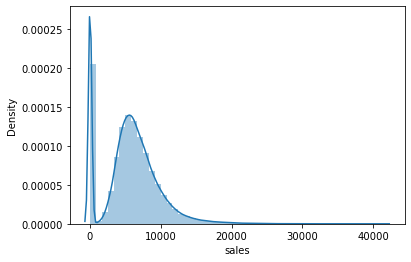

In [64]:
#verificar a distribuição das vendas
sns.distplot( df1['sales'])

C:\Users\claud\anaconda3\envs\ds_em_producao\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='competition_distance', ylabel='Density'>

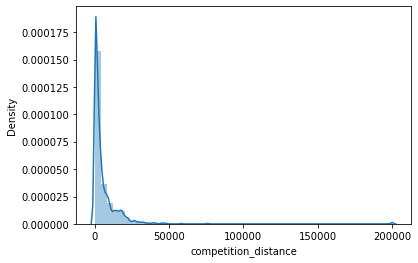

In [65]:
#verificar a distribuição dos competidores
sns.distplot( df1['competition_distance'])

## 2.7.2 Atributos Categóricas

In [66]:
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<AxesSubplot:xlabel='assortment', ylabel='sales'>

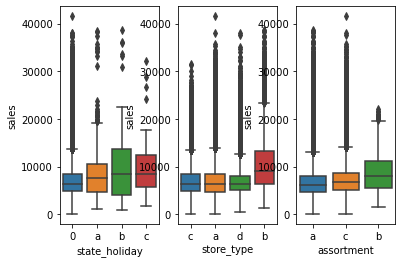

In [67]:
#eliminar dias 0 de venda(lojas fechadas)
aux1 = df1[(df1['state_holiday'] != 0) & (df1['sales'] > 0 )]

#plotar distirbuição de varaveis categoricas
plt.subplot (1,3,1)
sns.boxplot(x='state_holiday', y='sales', data=aux1)

plt.subplot (1,3,2)
sns.boxplot(x='store_type', y='sales', data=aux1)

plt.subplot (1,3,3)
sns.boxplot(x='assortment', y='sales', data=aux1)

# 3.0 Feature Engineering

In [68]:
df2 = df1.copy()

## 3.1 Mapa mental de hipóteses

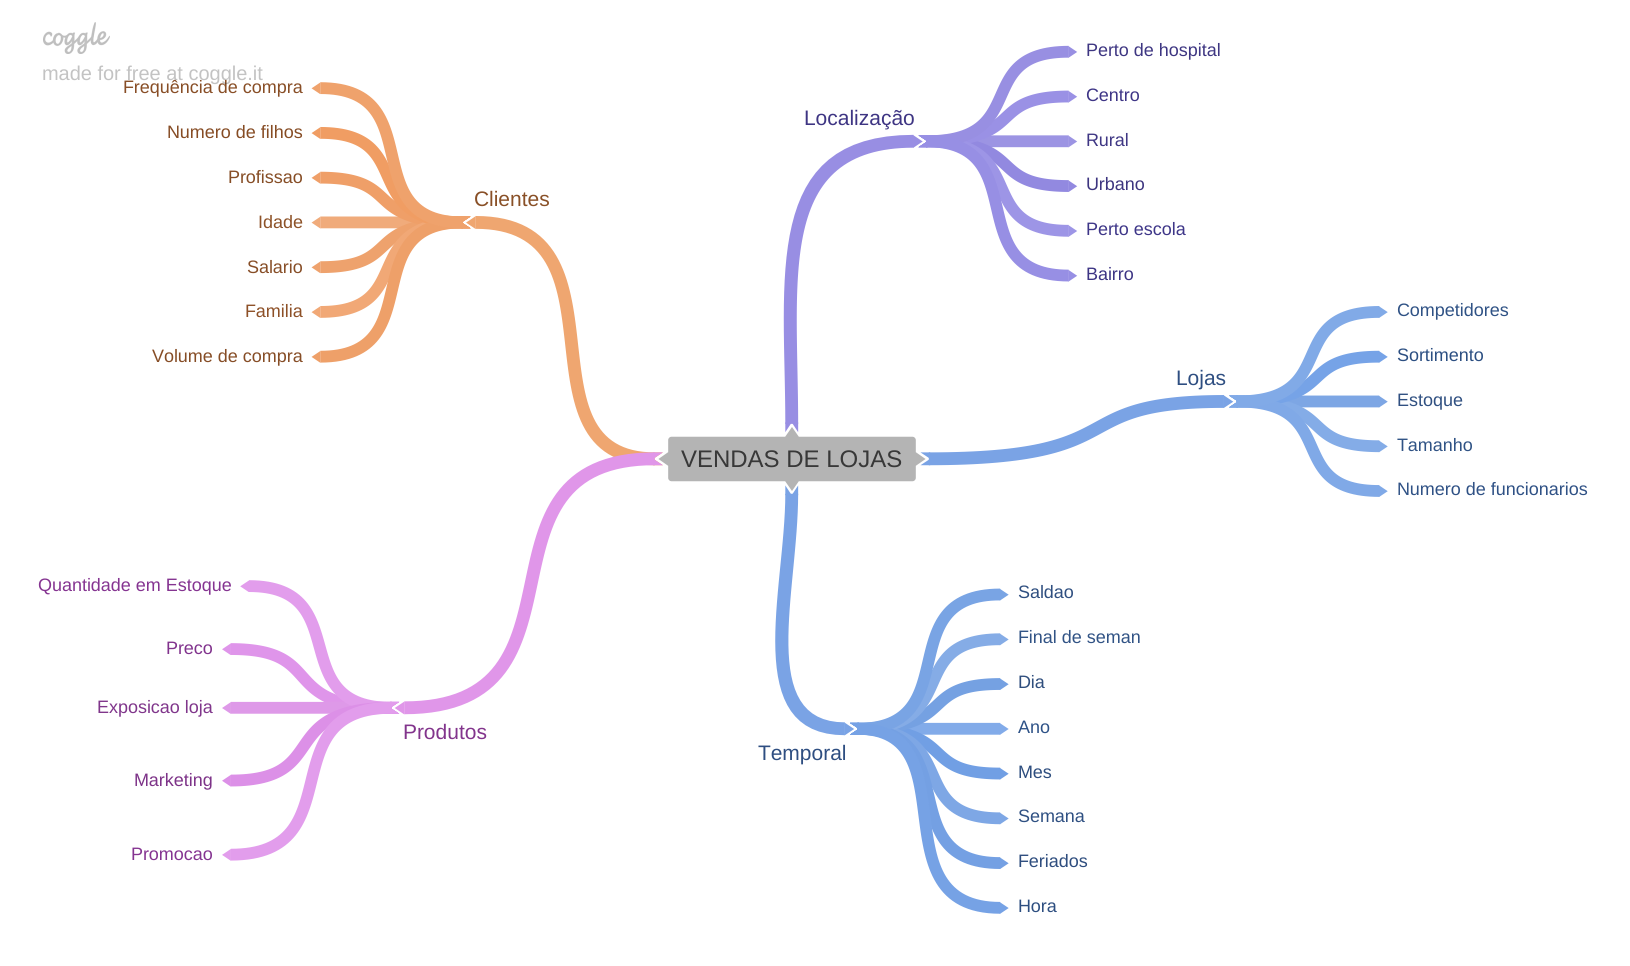

In [69]:
Image( 'img/VENDAS_DE_LOJAS.png')

## 3.2 criação das hipoteses

### 3.2.1 Hipoteses Loja

**1.** Lojas com maior quadro de funcionários deveriam vender mais.

**2.** Lojas com maior capacidade estoque deveriam vender mais.

**3.** Lojas com maior porte deveriam vender mais

**4.** Lojas com maior sortimento deveriam vender mais

**5.** Lojas com competidores mais perto deveriam vender menos.

**6.** Lojas com competidores à mais tempo deveriam vender mais.

### 3.2.2 Hipoteses Produto

**1.** Lojas que investem mais em marketing deveriam vender mais

**2.** Lojas que espoem mais o produto nas vistrines deveriam vender mais

**3.** Lojas que tem preços menores deveriam vender mais.

**4.** Lojas que tem preços menores por mais tempo nos produtos deveriam vender mais.

**5.** Lojas com promoções mais agrresivas (descontos maiores) deveriam vender mais

**6.** Lojas com promoções ativas por mais tempo deveriam vender mais

**7.** Lojas com maior dias de promoção deveriam vender mais

**8.** Lojas com mais promoções consecutivas deveriam vender mais

### 3.2.3 Hipoteses Tempo

**1.** Lojas abertas durante o feriado dde natal deveriam vender mais

**2.** Lojas deveriam vender mais ao longo dos anos

**3.** Lojas deveriam vender mais no segundo semestre do ano

**4.** Lojas deveriam vender mais depois do dia 10 de cada mÊs

**5.** Lojas deveriam vender menos aos finais de semana

**6.** Lojas deveriam vender menos durantes os feriados escolares

## 3.2 Lista Final de Hipoteses

**1.** Lojas com maior sortimento deveriam vender mais

**2.** Lojas com competidores mais perto deveriam vender menos.

**3.** Lojas com competidores à mais tempo deveriam vender mais.

**4** Lojas com promoções ativas por mais tempo deveriam vender mais

**5.** Lojas com maior dias de promoção deveriam vender mais

**6.** Lojas com mais promoções consecutivas deveriam vender mais

**7.** Lojas abertas durante o feriado dde natal deveriam vender mais

**8.** Lojas deveriam vender mais ao longo dos anos

**9.** Lojas deveriam vender mais no segundo semestre do ano

**10.** Lojas deveriam vender mais depois do dia 10 de cada mÊs

**11.** Lojas deveriam vender menos aos finais de semana

**12.** Lojas deveriam vender menos durantes os feriados escolares

## 3.3 Feature Engineering

In [70]:
df1['competition_open_since_year'].unique()

array([2.008e+03, 2.007e+03, 2.006e+03, 2.009e+03, 2.015e+03, 2.013e+03,
       2.014e+03, 2.000e+03, 2.011e+03, 7.000e+00, 2.010e+03, 2.005e+03,
       1.999e+03, 2.003e+03, 2.012e+03, 2.004e+03, 2.002e+03, 1.961e+03,
       1.995e+03, 2.001e+03, 1.990e+03, 1.994e+03, 1.900e+03, 1.998e+03,
       6.000e+00, 5.000e+00, 4.000e+00, 3.000e+00, 2.000e+00, 1.000e+00,
       1.200e+01, 1.100e+01, 1.000e+01, 9.000e+00, 8.000e+00])

In [71]:
# year
df2['year'] = df2['date'].dt.year

# month
df2['month'] = df2['date'].dt.month

#day
df2['day'] = df2['date'].dt.day

#week of yeardf2['year'] = df2['date'].dt.year
df2['week_of_year'] = df2['date'].dt.weekofyear

#year week
df2['year_week'] = df2['date'].dt.strftime( '%Y-%W' )

#competition since juntar colunas para formar data
df2['competition_since'] = df2.apply(lambda x: datetime.datetime(year=x['competition_open_since_year'] , month=x['competition_open_since_month'], day=1), axis=1 )
df2['competition_time_month'] = (( df2['date'] - df2['competition_since'])/ 30 ).apply( lambda x: x.days).astype( int )

#promo since


#assortment
#state holiday

C:\Users\claud\AppData\Local\Temp/ipykernel_12600/1871002195.py:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df2['week_of_year'] = df2['date'].dt.weekofyear


TypeError: integer argument expected, got float

In [ ]:
df2.head().T